In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import pymc as mc
from matplotlib import animation

import numpy as np
import seaborn as sns
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

import SolverDirectParabolic as Sol
from SolverDirectParabolic import *

import PlotterDirectParabolic as Plotter
from PlotterDirectParabolic import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



## Abstract

This notebook contains a mathematical description of the collision of two galaxies, one with several orbiting stars, as described by classical mechanics. The motion will be plotted at several values of time starting from some set of initial conditions. The situations modelled will be as follows: one case of retrograde passage and one case of direct passage. To model these a set of differential equations is defined and solved using Python's "odeint" solver. The solutions are the position and velocities of the distrupting galaxy and stars, which are saved into an array. To verify the correctness of the solution, the energy is plotted as a function of time to ensure that energy is conserved. 

## Base Question

The base question that this notebook explores is the mechanics of direct or retrograde passage of two massive point particles (galaxies). The difference between these two situations is the relative spin of the stars on the initial galaxy and the velocity of the disrupting galaxy. Retrograde passage is the case where the stars spin in a direction opposite to the motion of the disrupting galaxy, whilst direct passage has these velocities in the same orientation. In both cases the disrupting galaxy acts on the stars as well as the initial galaxy, disrupting their motions. The task is to plot the motion of all these bodies, and as a check, their energies. If energy is conserved, and the two galaxies are shown to interact, then it is concluded that the code accurately describes the interaction between two massie galaxies.

## Additional Questions

Additionally, this notebook will explore specific cases of direct passage of a heavy mass disruptor in an elliptical orbit and, secondly, retrograde passage of same mass disruptor in a parabolic orbit.

## Equations of Motion

$$ \ddot{\mathbf{r}} = -\gamma \left\{ \frac{M}{r^3}\mathbf{r} -\frac{S}{\rho^3}\boldsymbol{\rho} + \frac{S}{R^3}\boldsymbol\Re \right\} $$

$$ \ddot{\boldsymbol\Re} = -\gamma \frac{M+S}{R^3}\boldsymbol\Re$$

where 

* $\gamma$ is the Gravitational constant.
* $M$ is the central mass of the main galaxy and $S$ is the central mass of the disrupting galaxy
* $\mathbf{r}$ is the radius vector from mass $M$ to massless point particle $m$, representing a single (massless) star in the outer disk of the main galaxy.
* $\boldsymbol\Re$ is the radius vector from $M$ to $S$
* $\boldsymbol{\rho} = \boldsymbol{\Re} - \boldsymbol{r}$

## Velocity for a Circular Orbit

$$ v = \sqrt\frac{\gamma M}{r} $$

$ \gamma $ : The gravitational constant 

M : The mass of the central galaxy 

r : the radial distance of the star to the galaxy

## Velocity for a Parabolic Orbit

$$ v = \sqrt\frac{2\gamma (M+S)}{r} $$

$ \gamma $ : The gravitational constant 

M : The mass of the central galaxy 

r : the radial distance of the star to the galaxy

#calling get_solution(), plotcom(), or plot() will take >1m.
#To avoid this use the following (uncommented (!#)) code which reads from saved data 

#Get Solution

In [2]:
#soln = get_solution(parabolic,Direct,Sy)
#x,dx,y,dy,X,dX,Y,dY = soln
#Save(parabolic,Direct,Sy)

soln = np.load("ParabDirect.npz")
x, dx, y, dy, X, dX, Y, dY = soln['x'], soln['dx'], soln['y'], soln['dy'], soln['X'], soln['dX'], soln['Y'], soln['dY']

#Plot Solution

In [3]:
#plotcom()
#plot()

#this is the sell that takes the longest. it regenerates the .mp4 files.

#Plots Motion Relative to Central Galaxy

In [4]:
animation = mpy.VideoFileClip("Direct Parabolic Passage.mp4")
animation.ipython_display(fps=50)

#Plots Motion Relative to Center of Mass

In [5]:
animation2 = mpy.VideoFileClip("Direct Parabolic Passage COM.mp4")
animation2.ipython_display(fps=50)

## Energy of the Orbit

$$ E = T + U = \frac{1}{2} S v^2 -\frac{\gamma M S}{R} $$

M: mass of the central galaxy

S: mass of the disrupting galaxy

v: velocity fo the disrupting galaxy

R: radial distance of central galaxy to disrupting galaxy

$ \gamma:$ gravitational constant 

energy() returns an array of energy values at the time values defined in t (the array) and is defined by the above formula. Note how we are ignoring contribution of the stars.

The below cell plots the energy as a function of time. 

The percent difference between maximum energy value and minimum energy value is...
39.0243452658


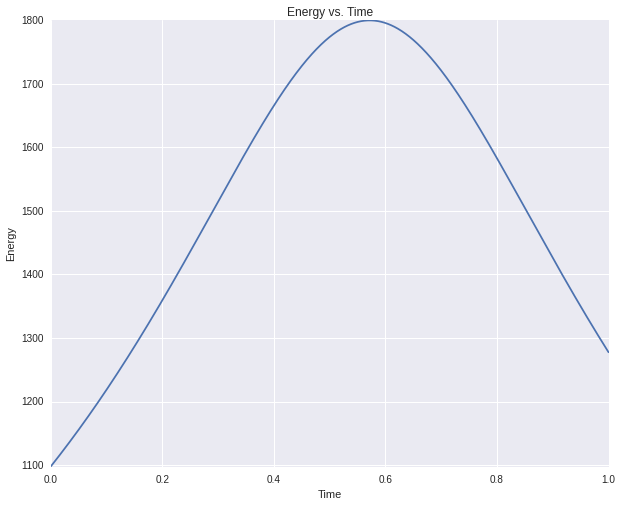

In [6]:
plt.ioff();
E = energy(parabolic,Direct,Sy);

plt.figure(figsize=(10,8));
plt.title("Energy vs. Time")
plt.ylabel("Energy")
plt.xlabel("Time")

plt.ion()
plt.plot(t,E);
plt.ylim(E.min(),E.max());
diff = abs(E.max() - E.min())/abs(E.max())*100
print("The percent difference between maximum energy value and minimum energy value is...")
print(diff)

#Citations

Toomre, A., & Toomre, J. (n.d). Galactic Bridges and Tails. ApJL ApJ The Astrophysical Journal, 623-623
Taylor, J. (2005). Classical Mechanics. Sausalito, Calif.: University Science Books.